In [1]:
%mkdir model/
%cd model

# load the pre-trained model and weights
!wget https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt

!wget https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel

# move out of the directory once the model is loaded
%cd ../

/content/model
--2024-11-26 09:18:53--  https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28092 (27K) [text/plain]
Saving to: ‘deploy.prototxt.txt’

deploy.prototxt.txt 100%[===================>]  27.43K  --.-KB/s    in 0.004s  

2024-11-26 09:18:54 (6.87 MB/s) - ‘deploy.prototxt.txt’ saved [28092/28092]

--2024-11-26 09:18:54--  https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/

In [3]:
# import relevant libraries
import numpy as np
import cv2

cv2.__version__

'4.10.0'

In [4]:
# load the serialized model from the local copy in model/
model_cfg = "model/deploy.prototxt.txt"
model_weights = "model/res10_300x300_ssd_iter_140000.caffemodel"

# read the model
detector = cv2.dnn.readNetFromCaffe(model_cfg, model_weights)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


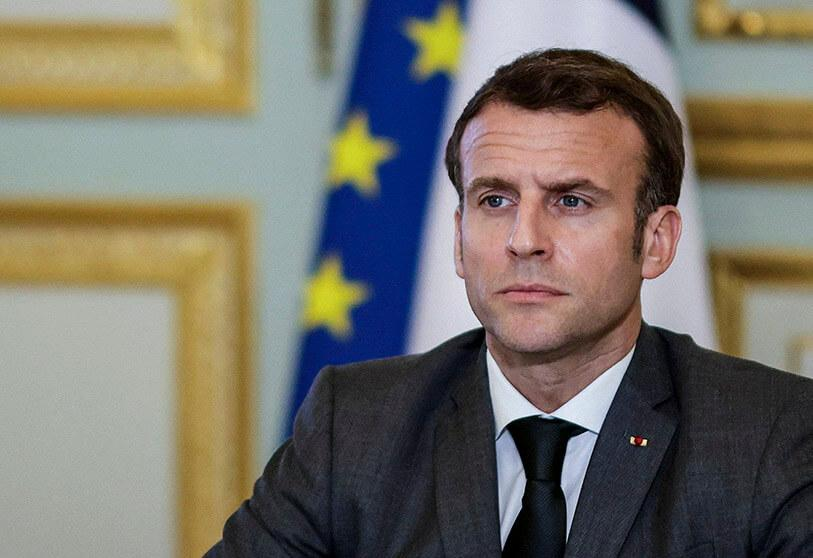

In [6]:
%cp /content/drive/MyDrive/Colab_Notebooks/datasets/SSD/macron.jpg .

test_img = "macron.jpg"

# load the test image and create an image blob
image = cv2.imread(test_img)
(h,w) = image.shape[:2]

# display the image
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [8]:
# set the intensity scaling factor; 1 in this case, i.e. original image intensities
# no need to scale between 0 to 1 for an SSD model, keep original intensity as 0 to 255
scalefactor = 1.0

# set the new dimensions for image resizing to match the network requirements
new_size = (300,300)

# create a blob using oenCV's DNN functionality and by performing mean subtraction to normalize the input
blob = cv2.dnn.blobFromImage(image,scalefactor,new_size,(127.5,127.5,127.5),swapRB=True,crop=False)

# set blob as input to the network
detector.setInput(blob)

# compute the forward pass - detect faces if any
detections = detector.forward()
detections.shape

(1, 1, 200, 7)

In [10]:
# Declare an array
print(detections[0][0][0])

# compute the length of the array
print(len(detections[0][0]))

# set the confidence threshold
confidence_threshold = 0.5

[0.         1.         0.9996408  0.5665413  0.18484493 0.7850617
 0.6287232 ]
200


In [11]:
detections.shape[2]

200

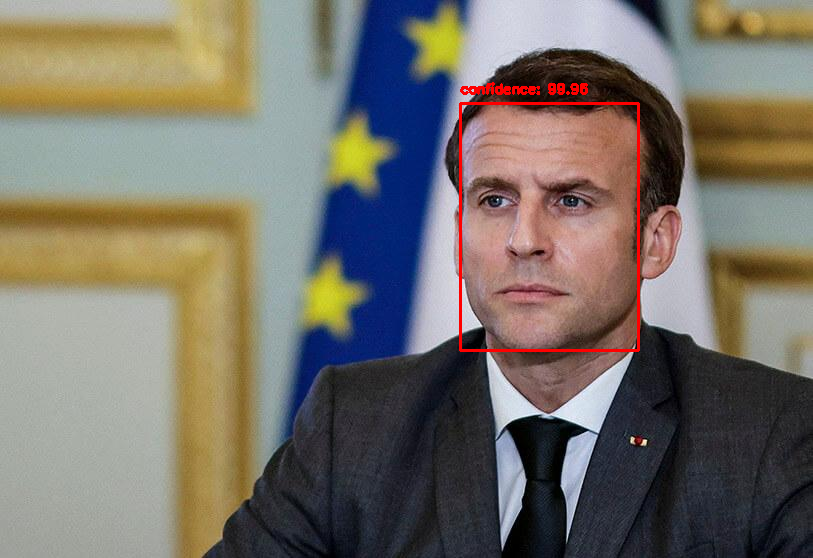

In [12]:
# loop over the detections
for i in range(0,detections.shape[2]):
  # extract the confidence (i.e., probability) associated with the prediction
  confidence = detections[0,0,i,2]

  # ignore weak detections
  if confidence > confidence_threshold:
    # compute the (x, y)-coordinates of the bounding box for the detected object
    box = detections[0,0,i,3:7] * np.array([w,h,w,h])
    (startX,startY,endX,endY) = box.astype("int")
    # draw the bounding box of the detected face
    cv2.rectangle(image,(startX,startY),(endX,endY),(0,0,255),2)
    # print the probability of this detction
    text = "confidence: {:.2f}".format(confidence*100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(image,text,(startX,y),cv2.FONT_HERSHEY_SIMPLEX,0.45,(0,0,255),2)


# show the output image
cv2_imshow(image)